1) Extract reviews of any product from ecommerce website like amazon, 2) Perform emotion mining

In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [42]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('Amazon - reviews.csv')
reviews

,(UPDATED) 75inch - Came broken … other than that it’s excellent but beware of the warehouse handling,6 people found this helpful,JadasJoyJadasJoy,5,2020-09-06T17:39:17,The media could not be loaded. ( 75 inch AU8000 ) - I will not let my initial experience with shipping take away from this product. THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED SERIES …. The displays pigmentation is UNMATCHED….!!!! ⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) beware of shipping but luckily Amazon has a great return policy they got my replacement tv to me in 3 days and it s perfect !…..Only not 5 stars because it came damaged / with the tv screen cracked. If the tv comes how it s supposed to and it has good quality I ll fix this review but until then I m very dissatisfied.
0,Nice TV. Great picture and sound.,7 people found this helpful,PakiPaki,5,2020-06-26T14:59:17,I was not so sure to order Tv. Online and a li...
1,Smart system freezes constantly unresponsive ...,3 people found this helpful,SrHassSrHass,1,2020-06-26T14:59:17,A few years ago I switched exclusively to sams...
2,Love it … day 1,4 people found this helpful,Justharry,5,2020-03-19T13:59:17,This is a day 1 just set it up review … in th...
3,"I have a 65"" Curved Samsung 6500 series & Sams...",4 people found this helpful,Juan Hernadez,1,2020-04-15T17:59:17,My 65 curved Samsung 4k from a couple years a...
4,Stuck in soap opera effect poor customer serv...,4 people found this helpful,Protect yourselfProtect yourself,2,2020-05-22T11:59:17,I selected this TV for: Apple TV compatibility...
5,First one defective,2 people found this helpful,Cameron JarvisCameron Jarvis,1,2020-07-12T13:59:17,Had the TV for a little over a month and pict...
6,Great TV at an affordable price!,2 people found this helpful,Amazon Customer,5,2020-03-25T17:59:17,I did a lot of research before purchasing this...
7,Exactly what I was looking for!,7 people found this helpful,Carl S.,5,2020-06-27T11:59:17,Perfect size easy set up and the sound qualit...
8,Love it,5 people found this helpful,Amazon CustomerAmazon Customer,5,2020-05-17T17:59:17,The delivery was flawless. I asked if they cou...
9,Samsung Lemon,3 people found this helpful,Jane Balter,1,2020-06-27T11:59:17,Let me begin this review by stating that we ha...


# Text Preprocessing

In [43]:
reviews=[comment.strip() for comment in reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:15]

['(UPDATED) 75inch - Came broken … other than that it’s excellent but beware of the warehouse handling',
 '6 people found this helpful',
 'JadasJoyJadasJoy',
 '5',
 '2020-09-06T17:39:17',
 'The media could not be loaded. \xa0( 75 inch AU8000 ) - I will not let my initial experience with shipping take away from this product. THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED SERIES …. The displays pigmentation is UNMATCHED….!!!! ⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) beware of shipping but luckily Amazon has a great return policy they got my replacement tv to me in 3 days and it s perfect !…..Only not 5 stars because it came damaged / with the tv screen cracked. If the tv comes how it s supposed to and it has good quality I ll fix this review but until then I m very dissatisfied.']

In [44]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'(UPDATED) 75inch - Came broken … other than that it’s excellent but beware of the warehouse handling 6 people found this helpful JadasJoyJadasJoy 5 2020-09-06T17:39:17 The media could not be loaded. \xa0( 75 inch AU8000 ) - I will not let my initial experience with shipping take away from this product. THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED SERIES …. The displays pigmentation is UNMATCHED….!!!! ⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) beware of shipping but luckily Amazon has a great return policy they got my replacement tv to me in 3 days and it s perfect !…..Only not 5 stars because it came damaged / with the tv screen cracked. If the tv comes how it s supposed to and it has good quality I ll fix this review but until then I m very dissatisfied.'

In [52]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['UPDATED', '75inch', 'Came', 'broken', '…', 'other', 'than', 'that', 'it', '’', 's', 'excellent', 'but', 'beware', 'of', 'the', 'warehouse', 'handling', '6', 'people', 'found', 'this', 'helpful', 'JadasJoyJadasJoy', '5', '20200906T173917', 'The', 'media', 'could', 'not', 'be', 'loaded', '75', 'inch', 'AU8000', 'I', 'will', 'not', 'let', 'my', 'initial', 'experience', 'with', 'shipping', 'take', 'away', 'from', 'this', 'product', 'THIS']


In [54]:
len(text_tokens)

134

In [55]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['UPDATED', '75inch', 'Came', 'broken', '…', '’', 'excellent', 'beware', 'warehouse', 'handling', '6', 'people', 'found', 'helpful', 'JadasJoyJadasJoy', '5', '20200906T173917', 'media', 'could', 'loaded', '75', 'inch', 'AU8000', 'let', 'initial', 'experience', 'shipping', 'take', 'away', 'product', 'THIS', 'IS', 'THE', 'BEST', 'TV', 'OUT', 'BEHIND', 'SAMSUNGS', 'QLED', 'SERIES', '…', 'displays', 'pigmentation', 'UNMATCHED…', '⭐️⭐️⭐️⭐️⭐️', 'Initial', 'experience', 'below…', 'beware', 'shipping', 'luckily', 'Amazon', 'great', 'return', 'policy', 'got', 'replacement', 'tv', '3', 'days', 'perfect', '…Only', '5', 'stars', 'came', 'damaged', 'tv', 'screen', 'cracked', 'If', 'tv', 'comes', 'supposed', 'good', 'quality', 'fix', 'review', 'dissatisfied']


In [56]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['updated', '75inch', 'came', 'broken', '…', '’', 'excellent', 'beware', 'warehouse', 'handling', '6', 'people', 'found', 'helpful', 'jadasjoyjadasjoy', '5', '20200906t173917', 'media', 'could', 'loaded', '75', 'inch', 'au8000', 'let', 'initial', 'experience', 'shipping', 'take', 'away', 'product', 'this', 'is', 'the', 'best', 'tv', 'out', 'behind', 'samsungs', 'qled', 'series', '…', 'displays', 'pigmentation', 'unmatched…', '⭐️⭐️⭐️⭐️⭐️', 'initial', 'experience', 'below…', 'beware', 'shipping', 'luckily', 'amazon', 'great', 'return', 'policy', 'got', 'replacement', 'tv', '3', 'days', 'perfect', '…only', '5', 'stars', 'came', 'damaged', 'tv', 'screen', 'cracked', 'if', 'tv', 'comes', 'supposed', 'good', 'quality', 'fix', 'review', 'dissatisfied']


In [57]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['updat', '75inch', 'came', 'broken', '…', '’', 'excel', 'bewar', 'warehous', 'handl', '6', 'peopl', 'found', 'help', 'jadasjoyjadasjoy', '5', '20200906t173917', 'media', 'could', 'load', '75', 'inch', 'au8000', 'let', 'initi', 'experi', 'ship', 'take', 'away', 'product', 'thi', 'is', 'the', 'best', 'tv', 'out', 'behind', 'samsung', 'qled', 'seri', '…', 'display', 'pigment', 'unmatched…', '⭐️⭐️⭐️⭐️⭐️', 'initi', 'experi', 'below…', 'bewar', 'ship', 'luckili', 'amazon', 'great', 'return', 'polici', 'got', 'replac', 'tv', '3', 'day', 'perfect', '…onli', '5', 'star', 'came', 'damag', 'tv', 'screen', 'crack', 'if', 'tv', 'come', 'suppos', 'good', 'qualiti', 'fix', 'review', 'dissatisfi']


In [58]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

updated 75inch came broken … ’ excellent beware warehouse handling 6 people found helpful jadasjoyjadasjoy 5 20200906t173917 media could loaded 75 inch au8000 let initial experience shipping take away product this is the best tv out behind samsungs qled series … displays pigmentation unmatched… ⭐️⭐️⭐️⭐️⭐️ initial experience below… beware shipping luckily amazon great return policy got replacement tv 3 days perfect …only 5 stars came damaged tv screen cracked if tv comes supposed good quality fix review dissatisfied


In [59]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['update', '75inch', 'come', 'break', '…', "'", 'excellent', 'beware', 'warehouse', 'handle', '6', 'people', 'find', 'helpful', 'jadasjoyjadasjoy', '5', '20200906t173917', 'medium', 'could', 'load', '75', 'inch', 'au8000', 'let', 'initial', 'experience', 'shipping', 'take', 'away', 'product', 'this', 'be', 'the', 'good', 'tv', 'out', 'behind', 'samsung', 'qle', 'series', '…', 'displays', 'pigmentation', 'unmatched', '…', '⭐', '️', '⭐', '️', '⭐', '️', '⭐', '️', '⭐', '️', 'initial', 'experience', 'below', '…', 'beware', 'ship', 'luckily', 'amazon', 'great', 'return', 'policy', 'get', 'replacement', 'tv', '3', 'day', 'perfect', '…', 'only', '5', 'star', 'came', 'damage', 'tv', 'screen', 'crack', 'if', 'tv', 'comes', 'suppose', 'good', 'quality', 'fix', 'review', 'dissatisfy']


In [60]:
clean_reviews=' '.join(lemmas)
clean_reviews

"update 75inch come break … ' excellent beware warehouse handle 6 people find helpful jadasjoyjadasjoy 5 20200906t173917 medium could load 75 inch au8000 let initial experience shipping take away product this be the good tv out behind samsung qle series … displays pigmentation unmatched … ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️ initial experience below … beware ship luckily amazon great return policy get replacement tv 3 day perfect … only 5 star came damage tv screen crack if tv comes suppose good quality fix review dissatisfy"

# Feature Extaction
1. Using CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [62]:
print(cv.vocabulary_)

{'update': 61, '75inch': 2, 'come': 12, 'break': 10, 'excellent': 20, 'beware': 9, 'warehouse': 62, 'handle': 27, 'people': 39, 'find': 22, 'helpful': 28, 'jadasjoyjadasjoy': 32, '20200906t173917': 0, 'medium': 36, 'could': 14, 'load': 34, '75': 1, 'inch': 30, 'au8000': 4, 'let': 33, 'initial': 31, 'experience': 21, 'shipping': 53, 'take': 56, 'away': 5, 'product': 43, 'this': 58, 'be': 6, 'the': 57, 'good': 25, 'tv': 59, 'out': 38, 'behind': 7, 'samsung': 49, 'qle': 44, 'series': 51, 'displays': 18, 'pigmentation': 41, 'unmatched': 60, 'below': 8, 'ship': 52, 'luckily': 35, 'amazon': 3, 'great': 26, 'return': 47, 'policy': 42, 'get': 24, 'replacement': 46, 'day': 17, 'perfect': 40, 'only': 37, 'star': 54, 'came': 11, 'damage': 16, 'screen': 50, 'crack': 15, 'if': 29, 'comes': 13, 'suppose': 55, 'quality': 45, 'fix': 23, 'review': 48, 'dissatisfy': 19}


In [64]:
print(cv.get_feature_names()[50:100])

['screen', 'series', 'ship', 'shipping', 'star', 'suppose', 'take', 'the', 'this', 'tv', 'unmatched', 'update', 'warehouse']


In [65]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
print(reviewscv.toarray().shape)

(90, 63)


# 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [67]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [68]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['20200906t173917', '75', '75inch', 'amazon', 'au8000', 'away', 'be', 'behind', 'below', 'beware', 'break', 'came', 'come', 'comes', 'could', 'crack', 'damage', 'day', 'displays', 'dissatisfy', 'excellent', 'experience', 'find', 'fix', 'get', 'good', 'great', 'handle', 'helpful', 'if', 'inch', 'initial', 'jadasjoyjadasjoy', 'let', 'load', 'luckily', 'medium', 'only', 'out', 'people', 'perfect', 'pigmentation', 'policy', 'product', 'qle', 'quality', 'replacement', 'return', 'review', 'samsung', 'screen', 'series', 'ship', 'shipping', 'star', 'suppose', 'take', 'the', 'this', 'tv', 'unmatched', 'update', 'warehouse']
[[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3. TF-IDF Vectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [70]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['20200906t173917', '75', '75inch', 'amazon', 'au8000', 'away', 'be', 'behind', 'below', 'beware', 'break', 'came', 'come', 'comes', 'could', 'crack', 'damage', 'day', 'displays', 'dissatisfy', 'excellent', 'experience', 'find', 'fix', 'get', 'good', 'great', 'handle', 'helpful', 'if', 'inch', 'initial', 'jadasjoyjadasjoy', 'let', 'load', 'luckily', 'medium', 'only', 'out', 'people', 'perfect', 'pigmentation', 'policy', 'product', 'qle', 'quality', 'replacement', 'return', 'review', 'samsung', 'screen', 'series', 'ship', 'shipping', 'star', 'suppose', 'take', 'the', 'this', 'tv', 'unmatched', 'update', 'warehouse']
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generate Word Cloud

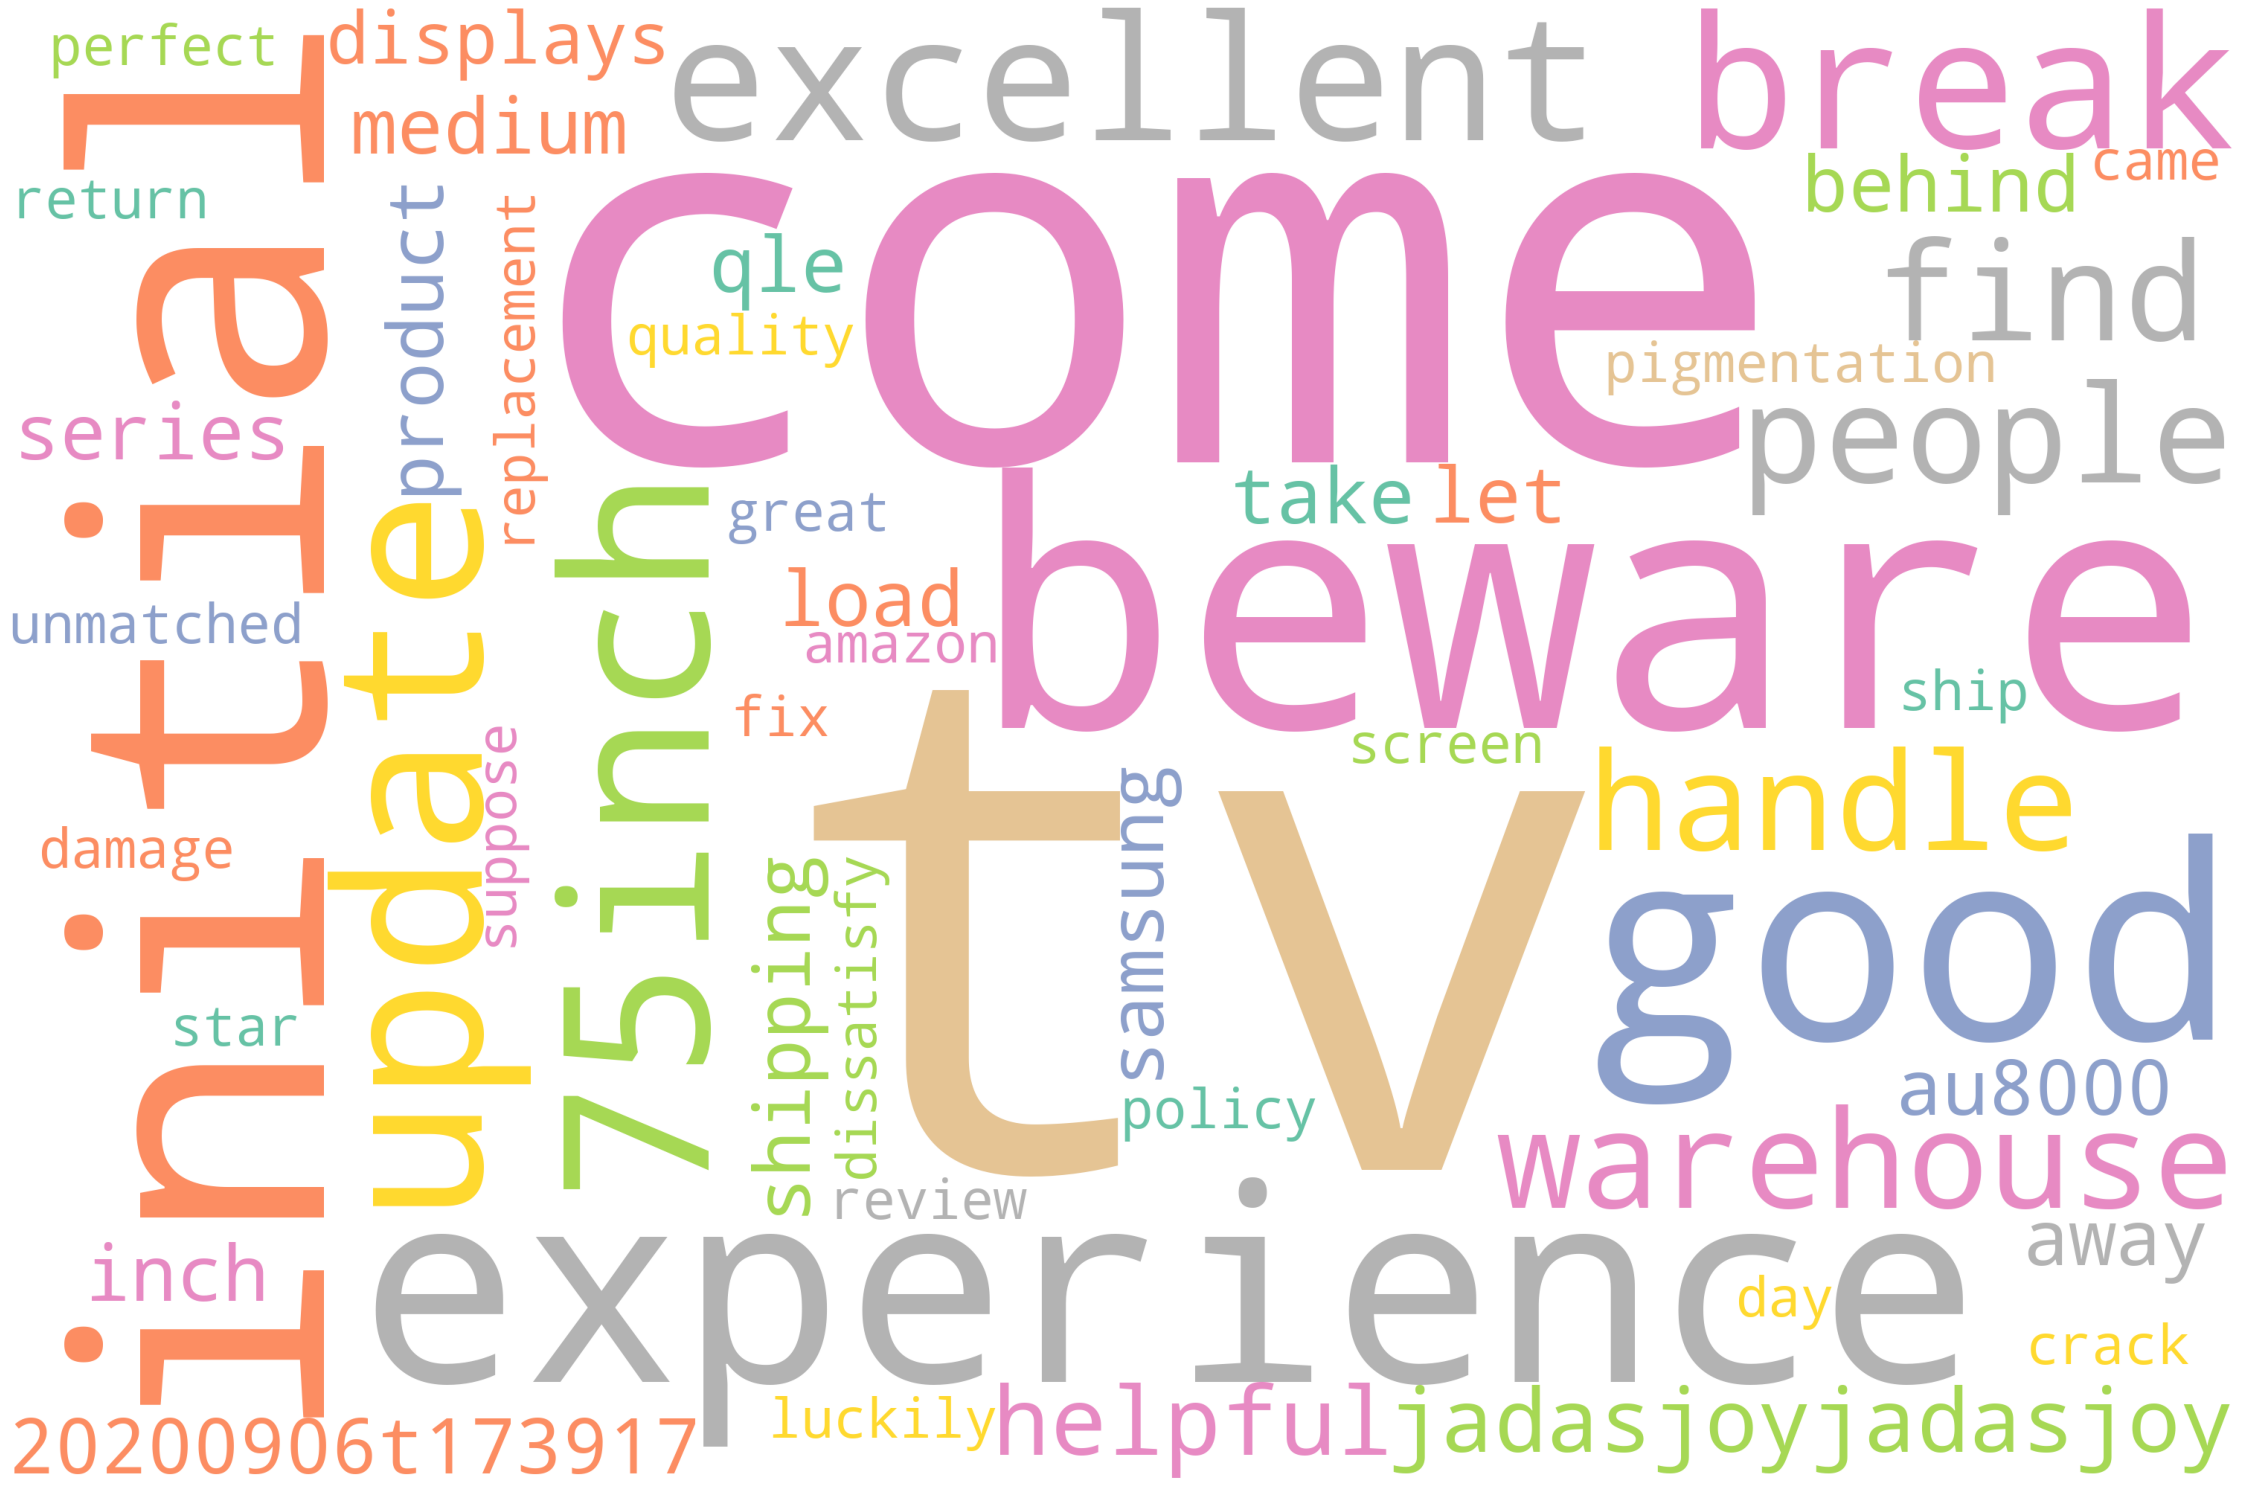

In [71]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [73]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [75]:
for token in doc_block[50:100]:
    print(token,token.pos_)

️ NOUN
⭐ NOUN
️ NOUN
⭐ NOUN
️ NOUN
initial ADJ
experience NOUN
below ADV
… PUNCT
beware VERB
ship NOUN
luckily ADV
amazon ADJ
great ADJ
return NOUN
policy NOUN
get VERB
replacement NOUN
tv NOUN
3 NUM
day NOUN
perfect ADJ
… PUNCT
only ADV
5 NUM
star NOUN
came VERB
damage NOUN
tv NOUN
screen NOUN
crack NOUN
if SCONJ
tv NOUN
comes VERB
suppose VERB
good ADJ
quality NOUN
fix NOUN
review NOUN
dissatisfy NOUN


In [76]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[50:100])

['fix', 'review', 'dissatisfy']


In [77]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tv,4
1,beware,2
2,experience,2
3,update,1
4,75inch,1
5,come,1
6,break,1
7,warehouse,1
8,handle,1
9,people,1


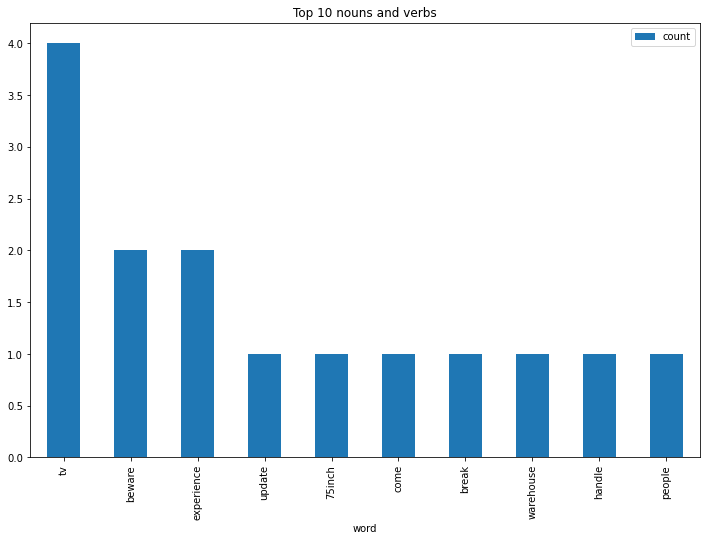

In [78]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [79]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['(UPDATED) 75inch - Came broken … other than that it’s excellent but beware of the warehouse handling 6 people found this helpful JadasJoyJadasJoy 5 2020-09-06T17:39:17 The media could not be loaded.',
 '( 75 inch AU8000 ) - I will not let my initial experience with shipping take away from this product.',
 'THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED SERIES ….',
 'The displays pigmentation is UNMATCHED….!!!!',
 '⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) beware of shipping but luckily Amazon has a great return policy they got my replacement tv to me in 3 days and it s perfect !…..Only not 5 stars because it came damaged / with the tv screen cracked.',
 'If the tv comes how it s supposed to and it has good quality I ll fix this review but until then I m very dissatisfied.']

In [80]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,(UPDATED) 75inch - Came broken … other than th...
1,( 75 inch AU8000 ) - I will not let my initial...
2,THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED S...
3,The displays pigmentation is UNMATCHED….!!!!
4,⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) bew...
5,If the tv comes how it s supposed to and it ha...


In [81]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [82]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [84]:
# manual testing
calculate_sentiment(text='good service')

3

In [85]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0    5
1    0
2    0
3    0
4    6
5    1
Name: sentiment_value, dtype: int64

In [86]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    31
1    20
2    11
3     5
4    45
5    26
Name: word_count, dtype: int64

In [87]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1,( 75 inch AU8000 ) - I will not let my initial...,0,20
2,THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED S...,0,11
3,The displays pigmentation is UNMATCHED….!!!!,0,5
5,If the tv comes how it s supposed to and it ha...,1,26
0,(UPDATED) 75inch - Came broken … other than th...,5,31
4,⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) bew...,6,45


In [88]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    6.00000
mean     2.00000
std      2.75681
min      0.00000
25%      0.00000
50%      0.50000
75%      4.00000
max      6.00000
Name: sentiment_value, dtype: float64

In [89]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,( 75 inch AU8000 ) - I will not let my initial...,0,20
2,THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED S...,0,11
3,The displays pigmentation is UNMATCHED….!!!!,0,5


In [90]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,(UPDATED) 75inch - Came broken … other than th...,5,31
4,⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) bew...,6,45
5,If the tv comes how it s supposed to and it ha...,1,26


In [91]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,(UPDATED) 75inch - Came broken … other than th...,5,31,0
1,( 75 inch AU8000 ) - I will not let my initial...,0,20,1
2,THIS IS THE BEST TV OUT BEHIND SAMSUNGS QLED S...,0,11,2
3,The displays pigmentation is UNMATCHED….!!!!,0,5,3
4,⭐️⭐️⭐️⭐️⭐️ ( Initial experience is below…) bew...,6,45,4
5,If the tv comes how it s supposed to and it ha...,1,26,5


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

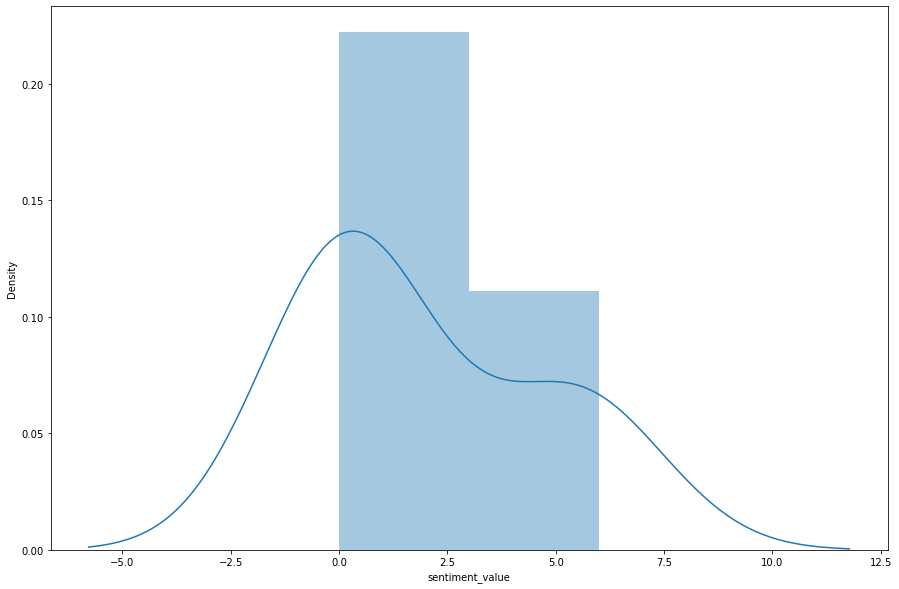

In [92]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

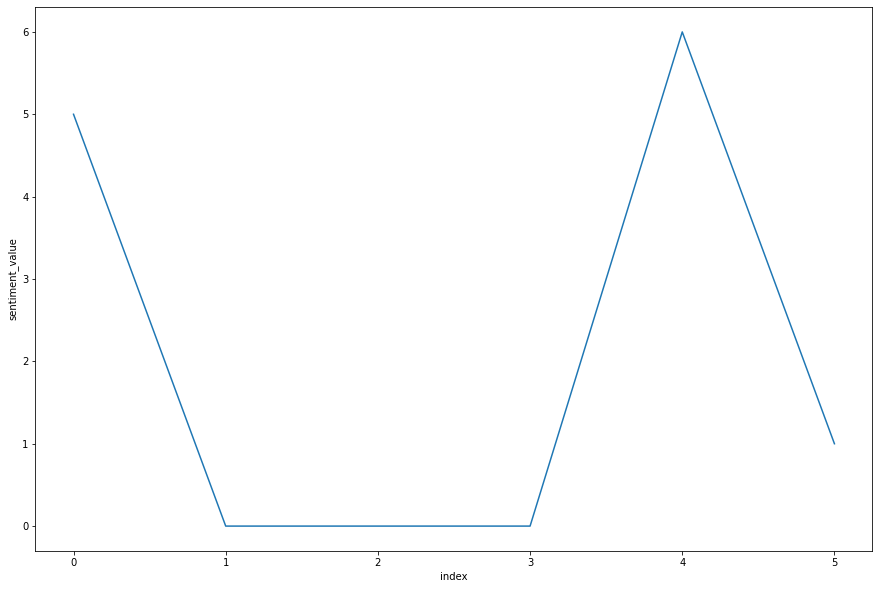

In [93]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)